# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

## **Importing Libraries**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

## **Looking at DF**

In [0]:
# Looking at my df
url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
df = pd.read_csv(url)

In [66]:
df.shape

(1460, 81)

In [0]:
# Changing the shape to get a better look at it
df.head().T

## **Cleaning Nulls **

In [68]:
# How many nulls do I have?
df.isnull().sum().sum()

6965

## **Linear Regression**

In [0]:
target = 'SalePrice'
predictor = ['LotArea']
y = df[target]
x = df[predictor]

In [0]:
# Not my code, will happily use forever though. 
# Saves a TON of time
def time_saver(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
    
    # Model Fitting
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # Make Predictions 
    y_pred = model.predict(x_test)
    
    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = r2_score(y_test, y_pred)
     
    # Print
    print('RMSE:', rmse)
    print('R Squared:', r2)
    print('Intercept:', model.intercept_)
    coefficients = pd.Series(model.coef_, x_train.columns)
    print(coefficients.to_string())

## **Setting up my baseline**

In [71]:
# Variables
target = 'SalePrice'
predictor = ['LotArea']
# Assigning them to x and y
y = df[target]
x = df[predictor]
# Calling on my happy function
time_saver(x, y)

RMSE: 84788.52525445858
R Squared: 0.06273946887816162
Intercept: 161006.99034068309
LotArea    1.911622


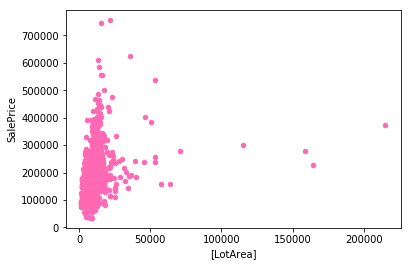

In [72]:
# Looking at the spread
# We have some outliers
df.plot(x=predictor, y=target, kind='scatter', color='hotpink');

In [73]:
# Testing what happens if log is utilized
# Variables
target = 'SalePrice'
predictor = ['LotArea']
# Log
y = np.log(df[target])
x = df[predictor]
# Checking it out
time_saver(x, y)

RMSE: 0.4192251809812096
R Squared: 0.05821532106123051
Intercept: 11.930653929291942
LotArea    0.000009


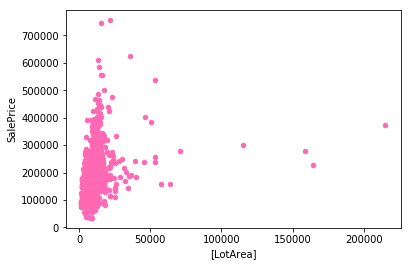

In [74]:
# Basically the same
df.plot(x=predictor, y=target, kind='scatter', color='hotpink');

## **Kitchen Sink **

In [0]:
# Only numbers
numbers_only = df.select_dtypes(include='number')
numbers_only = numbers_only.copy()

In [0]:
# Specifying the ones I would like to fill
numbers_only['LotFrontage'] = numbers_only['LotFrontage'].fillna(0)
numbers_only['GarageYrBlt'] = numbers_only['GarageYrBlt'].fillna(0)
numbers_only['MasVnrArea'] = numbers_only['MasVnrArea'].fillna(0)

In [77]:
numbers_only.isnull().sum().sum()

0

In [78]:
target = 'SalePrice'
predictors = ['MSSubClass','LotFrontage','LotArea',
              'OverallQual','OverallCond','YearBuilt',
              'YearRemodAdd','MasVnrArea','BsmtFinSF1',
              'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
              '1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath',
              'FullBath','HalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
              'GarageYrBlt','GarageCars','GarageArea',
              'WoodDeckSF','OpenPorchSF','EnclosedPorch',
              '3SsnPorch','ScreenPorch','PoolArea',
              'MiscVal','MoSold','YrSold']
y = numbers_only[target]
x = numbers_only[predictors]

time_saver(x, y)

RMSE: 36061.39606737885
R Squared: 0.8304603674991209
Intercept: -84812.89375783774
MSSubClass        -176.654624
LotFrontage        -18.073049
LotArea              0.394614
OverallQual      17812.415217
OverallCond       4546.658672
YearBuilt          340.268717
YearRemodAdd       155.676237
MasVnrArea          20.968044
BsmtFinSF1           8.565089
BsmtFinSF2          -1.705764
BsmtUnfSF           -0.590389
TotalBsmtSF          6.268937
1stFlrSF            11.584297
2ndFlrSF            14.524019
LowQualFinSF         4.259061
GrLivArea           30.367376
BsmtFullBath     10866.780087
BsmtHalfBath     -1058.443979
FullBath          3061.394917
HalfBath         -2272.668121
BedroomAbvGr     -9110.971930
KitchenAbvGr    -13314.979948
TotRmsAbvGrd      5091.363166
Fireplaces        4754.032393
GarageYrBlt        -14.076981
GarageCars       16456.287004
GarageArea           4.890747
WoodDeckSF          23.998209
OpenPorchSF         -9.250095
EnclosedPorch        9.678473
3SsnPorch       

## **Feature Engineering**

In [0]:
# Looking at Lot Frontage VS Area
numbers_only['Lot_Frontage_VS_Area'] = numbers_only['LotFrontage'] / numbers_only['LotArea']

In [80]:
target = 'SalePrice'
predictors = ['MSSubClass','LotFrontage','LotArea','OverallQual',
              'OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
              'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
              '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
              'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
              'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
              'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
              'PoolArea','MiscVal','MoSold','YrSold','Lot_Frontage_VS_Area']
y = numbers_only[target]
x = numbers_only[predictors]
time_saver(x,y)

RMSE: 36052.216537357446
R Squared: 0.8305466700961652
Intercept: -87847.51354744771
MSSubClass               -175.643507
LotFrontage               -14.446548
LotArea                     0.391229
OverallQual             17808.677425
OverallCond              4548.192099
YearBuilt                 340.177127
YearRemodAdd              155.642573
MasVnrArea                 20.977784
BsmtFinSF1                  8.562312
BsmtFinSF2                 -1.708814
BsmtUnfSF                  -0.575132
TotalBsmtSF                 6.278368
1stFlrSF                   11.559588
2ndFlrSF                   14.525206
LowQualFinSF                4.241327
GrLivArea                  30.326124
BsmtFullBath            10854.387627
BsmtHalfBath            -1057.035556
FullBath                 3076.032752
HalfBath                -2278.984950
BedroomAbvGr            -9130.356769
KitchenAbvGr           -13362.767929
TotRmsAbvGrd             5090.627747
Fireplaces               4738.782971
GarageYrBlt               -

In [0]:
# Looking at the Total Living Area in SQFT
numbers_only['Total_Living_Area_SQFT'] = ( numbers_only['BsmtFinSF1'] + 
             numbers_only['BsmtFinSF2'] + 
             numbers_only['GrLivArea'] )

In [82]:
target = 'SalePrice'
predictors = ['MSSubClass','LotFrontage','LotArea','OverallQual',
              'OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
              'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
              '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
              'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
              'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF',
              'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
              'PoolArea','MiscVal','MoSold','YrSold','Total_Living_Area_SQFT']
y = numbers_only[target]
x = numbers_only[predictors]

time_saver(x,y)

RMSE: 36061.396067379144
R Squared: 0.8304603674991182
Intercept: -84812.89375789816
MSSubClass                 -176.654624
LotFrontage                 -18.073049
LotArea                       0.394614
OverallQual               17812.415217
OverallCond                4546.658672
YearBuilt                   340.268717
YearRemodAdd                155.676237
MasVnrArea                   20.968044
BsmtFinSF1                    1.796598
BsmtFinSF2                   -8.474255
BsmtUnfSF                     6.178102
TotalBsmtSF                  -0.499555
1stFlrSF                      8.200051
2ndFlrSF                     11.139773
LowQualFinSF                  0.874815
GrLivArea                    20.214639
BsmtFullBath              10866.780087
BsmtHalfBath              -1058.443979
FullBath                   3061.394917
HalfBath                  -2272.668121
BedroomAbvGr              -9110.971930
KitchenAbvGr             -13314.979948
TotRmsAbvGrd               5091.363166
Fireplaces        

In [0]:
# Updated Property
numbers_only['Updated'] = numbers_only['YearRemodAdd'] - numbers_only['YearBuilt']

In [84]:
target = 'SalePrice'
predictors = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond',
              'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
              'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
              'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
              '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold',
              'Lot_Frontage_VS_Area', 'Updated']
y = numbers_only[target]
x = numbers_only[predictors]
time_saver(x,y)

RMSE: 36052.21653735658
R Squared: 0.8305466700961733
Intercept: -87847.51354742897
MSSubClass               -175.643507
LotFrontage               -14.446548
LotArea                     0.391229
OverallQual             17808.677425
OverallCond              4548.192099
YearBuilt                 278.665609
YearRemodAdd              217.154091
MasVnrArea                 20.977784
BsmtFinSF1                  8.562313
BsmtFinSF2                 -1.708813
BsmtUnfSF                  -0.575131
TotalBsmtSF                 6.278367
1stFlrSF                   11.559588
2ndFlrSF                   14.525207
LowQualFinSF                4.241328
GrLivArea                  30.326123
BsmtFullBath            10854.387627
BsmtHalfBath            -1057.035556
FullBath                 3076.032752
HalfBath                -2278.984950
BedroomAbvGr            -9130.356769
KitchenAbvGr           -13362.767929
TotRmsAbvGrd             5090.627747
Fireplaces               4738.782971
GarageYrBlt               -1

In [0]:
# How old
numbers_only['Age_of_House'] = 2015 - numbers_only['YearBuilt']

In [86]:
target = 'SalePrice'
predictors = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','Lot_Frontage_VS_Area', 'Updated', 
 'Age_of_House']
y = numbers_only[target]
x = numbers_only[predictors]

time_saver(x, y)

RMSE: 36052.21653735715
R Squared: 0.830546670096168
Intercept: 249059.20832887117
MSSubClass               -175.643507
LotFrontage               -14.446548
LotArea                     0.391229
OverallQual             17808.677425
OverallCond              4548.192099
YearBuilt                 167.199365
YearRemodAdd              161.420969
MasVnrArea                 20.977784
BsmtFinSF1                  8.562312
BsmtFinSF2                 -1.708814
BsmtUnfSF                  -0.575132
TotalBsmtSF                 6.278369
1stFlrSF                   11.559588
2ndFlrSF                   14.525206
LowQualFinSF                4.241328
GrLivArea                  30.326124
BsmtFullBath            10854.387627
BsmtHalfBath            -1057.035556
FullBath                 3076.032752
HalfBath                -2278.984950
BedroomAbvGr            -9130.356769
KitchenAbvGr           -13362.767929
TotRmsAbvGrd             5090.627747
Fireplaces               4738.782971
GarageYrBlt               -14

In [0]:
# Sqft vs Bathrooms
bathrooms = numbers_only['FullBath'] + numbers_only['HalfBath']
numbers_only['Bathroom_SQFT'] = (bathrooms / numbers_only['Total_Living_Area_SQFT'])

In [88]:
target = 'SalePrice'
predictors = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','Lot_Frontage_VS_Area', 'Updated', 
 'Age_of_House', 'Bathroom_SQFT']
y = numbers_only[target]
x = numbers_only[predictors]

time_saver(x, y)

RMSE: 36099.99216338969
R Squared: 0.8300972606646527
Intercept: 317208.58388383663
MSSubClass             -1.500952e+02
LotFrontage             7.296108e+00
LotArea                 4.645754e-01
OverallQual             1.735166e+04
OverallCond             4.066835e+03
YearBuilt               1.689327e+02
YearRemodAdd            1.722401e+02
MasVnrArea              1.951246e+01
BsmtFinSF1              1.427623e+00
BsmtFinSF2             -1.027972e+01
BsmtUnfSF               8.686758e+00
TotalBsmtSF            -1.517217e-01
1stFlrSF                7.354856e+00
2ndFlrSF                8.582025e+00
LowQualFinSF            1.916642e+00
GrLivArea               1.800552e+01
BsmtFullBath            7.262907e+03
BsmtHalfBath           -3.626914e+03
FullBath                2.499996e+04
HalfBath                1.987993e+04
BedroomAbvGr           -1.089145e+04
KitchenAbvGr           -1.243771e+04
TotRmsAbvGrd            4.544117e+03
Fireplaces              4.550751e+03
GarageYrBlt            -1.47

In [0]:
# Interaction feature

In [0]:
numbers_only['SQFT_VS_Rooms'] = numbers_only['TotRmsAbvGrd'] * numbers_only['GrLivArea']

In [93]:
target = 'SalePrice'
predictions = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','Lot_Frontage_VS_Area', 'Updated', 
 'Age_of_House', 'Overall_Quality_Poly', 'Overall_Cond_Poly', 'SQFT_VS_Rooms']
y = numbers_only[target]
x = numbers_only[predictors]

time_saver(x, y)

RMSE: 36099.99216338969
R Squared: 0.8300972606646527
Intercept: 317208.58388383663
MSSubClass             -1.500952e+02
LotFrontage             7.296108e+00
LotArea                 4.645754e-01
OverallQual             1.735166e+04
OverallCond             4.066835e+03
YearBuilt               1.689327e+02
YearRemodAdd            1.722401e+02
MasVnrArea              1.951246e+01
BsmtFinSF1              1.427623e+00
BsmtFinSF2             -1.027972e+01
BsmtUnfSF               8.686758e+00
TotalBsmtSF            -1.517217e-01
1stFlrSF                7.354856e+00
2ndFlrSF                8.582025e+00
LowQualFinSF            1.916642e+00
GrLivArea               1.800552e+01
BsmtFullBath            7.262907e+03
BsmtHalfBath           -3.626914e+03
FullBath                2.499996e+04
HalfBath                1.987993e+04
BedroomAbvGr           -1.089145e+04
KitchenAbvGr           -1.243771e+04
TotRmsAbvGrd            4.544117e+03
Fireplaces              4.550751e+03
GarageYrBlt            -1.47

In [0]:
# Polynominal Features

In [0]:
numbers_only['Overall_Quality_Poly'] = numbers_only['OverallQual'] ** 3

In [0]:
numbers_only['Overall_Cond_Poly'] = numbers_only['OverallCond'] ** 3

In [95]:
target = 'SalePrice'
predictors = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
 'BsmtFullBath', 'BsmtHalfBath',
 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
 'MoSold', 'YrSold','Lot_Frontage_VS_Area', 'Updated',
 'Age_of_House', 'Overall_Quality_Poly', 'Overall_Cond_Poly']
y = numbers_only[target]
x = numbers_only[predictors]

time_saver(x, y)

RMSE: 32063.632174211758
R Squared: 0.8659670422830471
Intercept: 695572.4230886297
MSSubClass               -153.480109
LotFrontage               -46.842889
LotArea                     0.433572
OverallQual            -15452.293206
OverallCond             11339.262266
YearBuilt                 197.583370
YearRemodAdd              171.580224
MasVnrArea                  9.491654
BsmtFinSF1                  5.032230
BsmtFinSF2                  1.374864
BsmtUnfSF                  -0.322832
TotalBsmtSF                 6.084256
1stFlrSF                   10.755526
2ndFlrSF                   15.373417
LowQualFinSF               -0.546685
GrLivArea                  25.582249
BsmtFullBath            12539.933195
BsmtHalfBath             2044.857820
FullBath                 5017.990440
HalfBath                 -534.410251
BedroomAbvGr            -3745.001058
KitchenAbvGr           -13150.878152
TotRmsAbvGrd             3514.786377
Fireplaces               6588.604772
GarageYrBlt                -

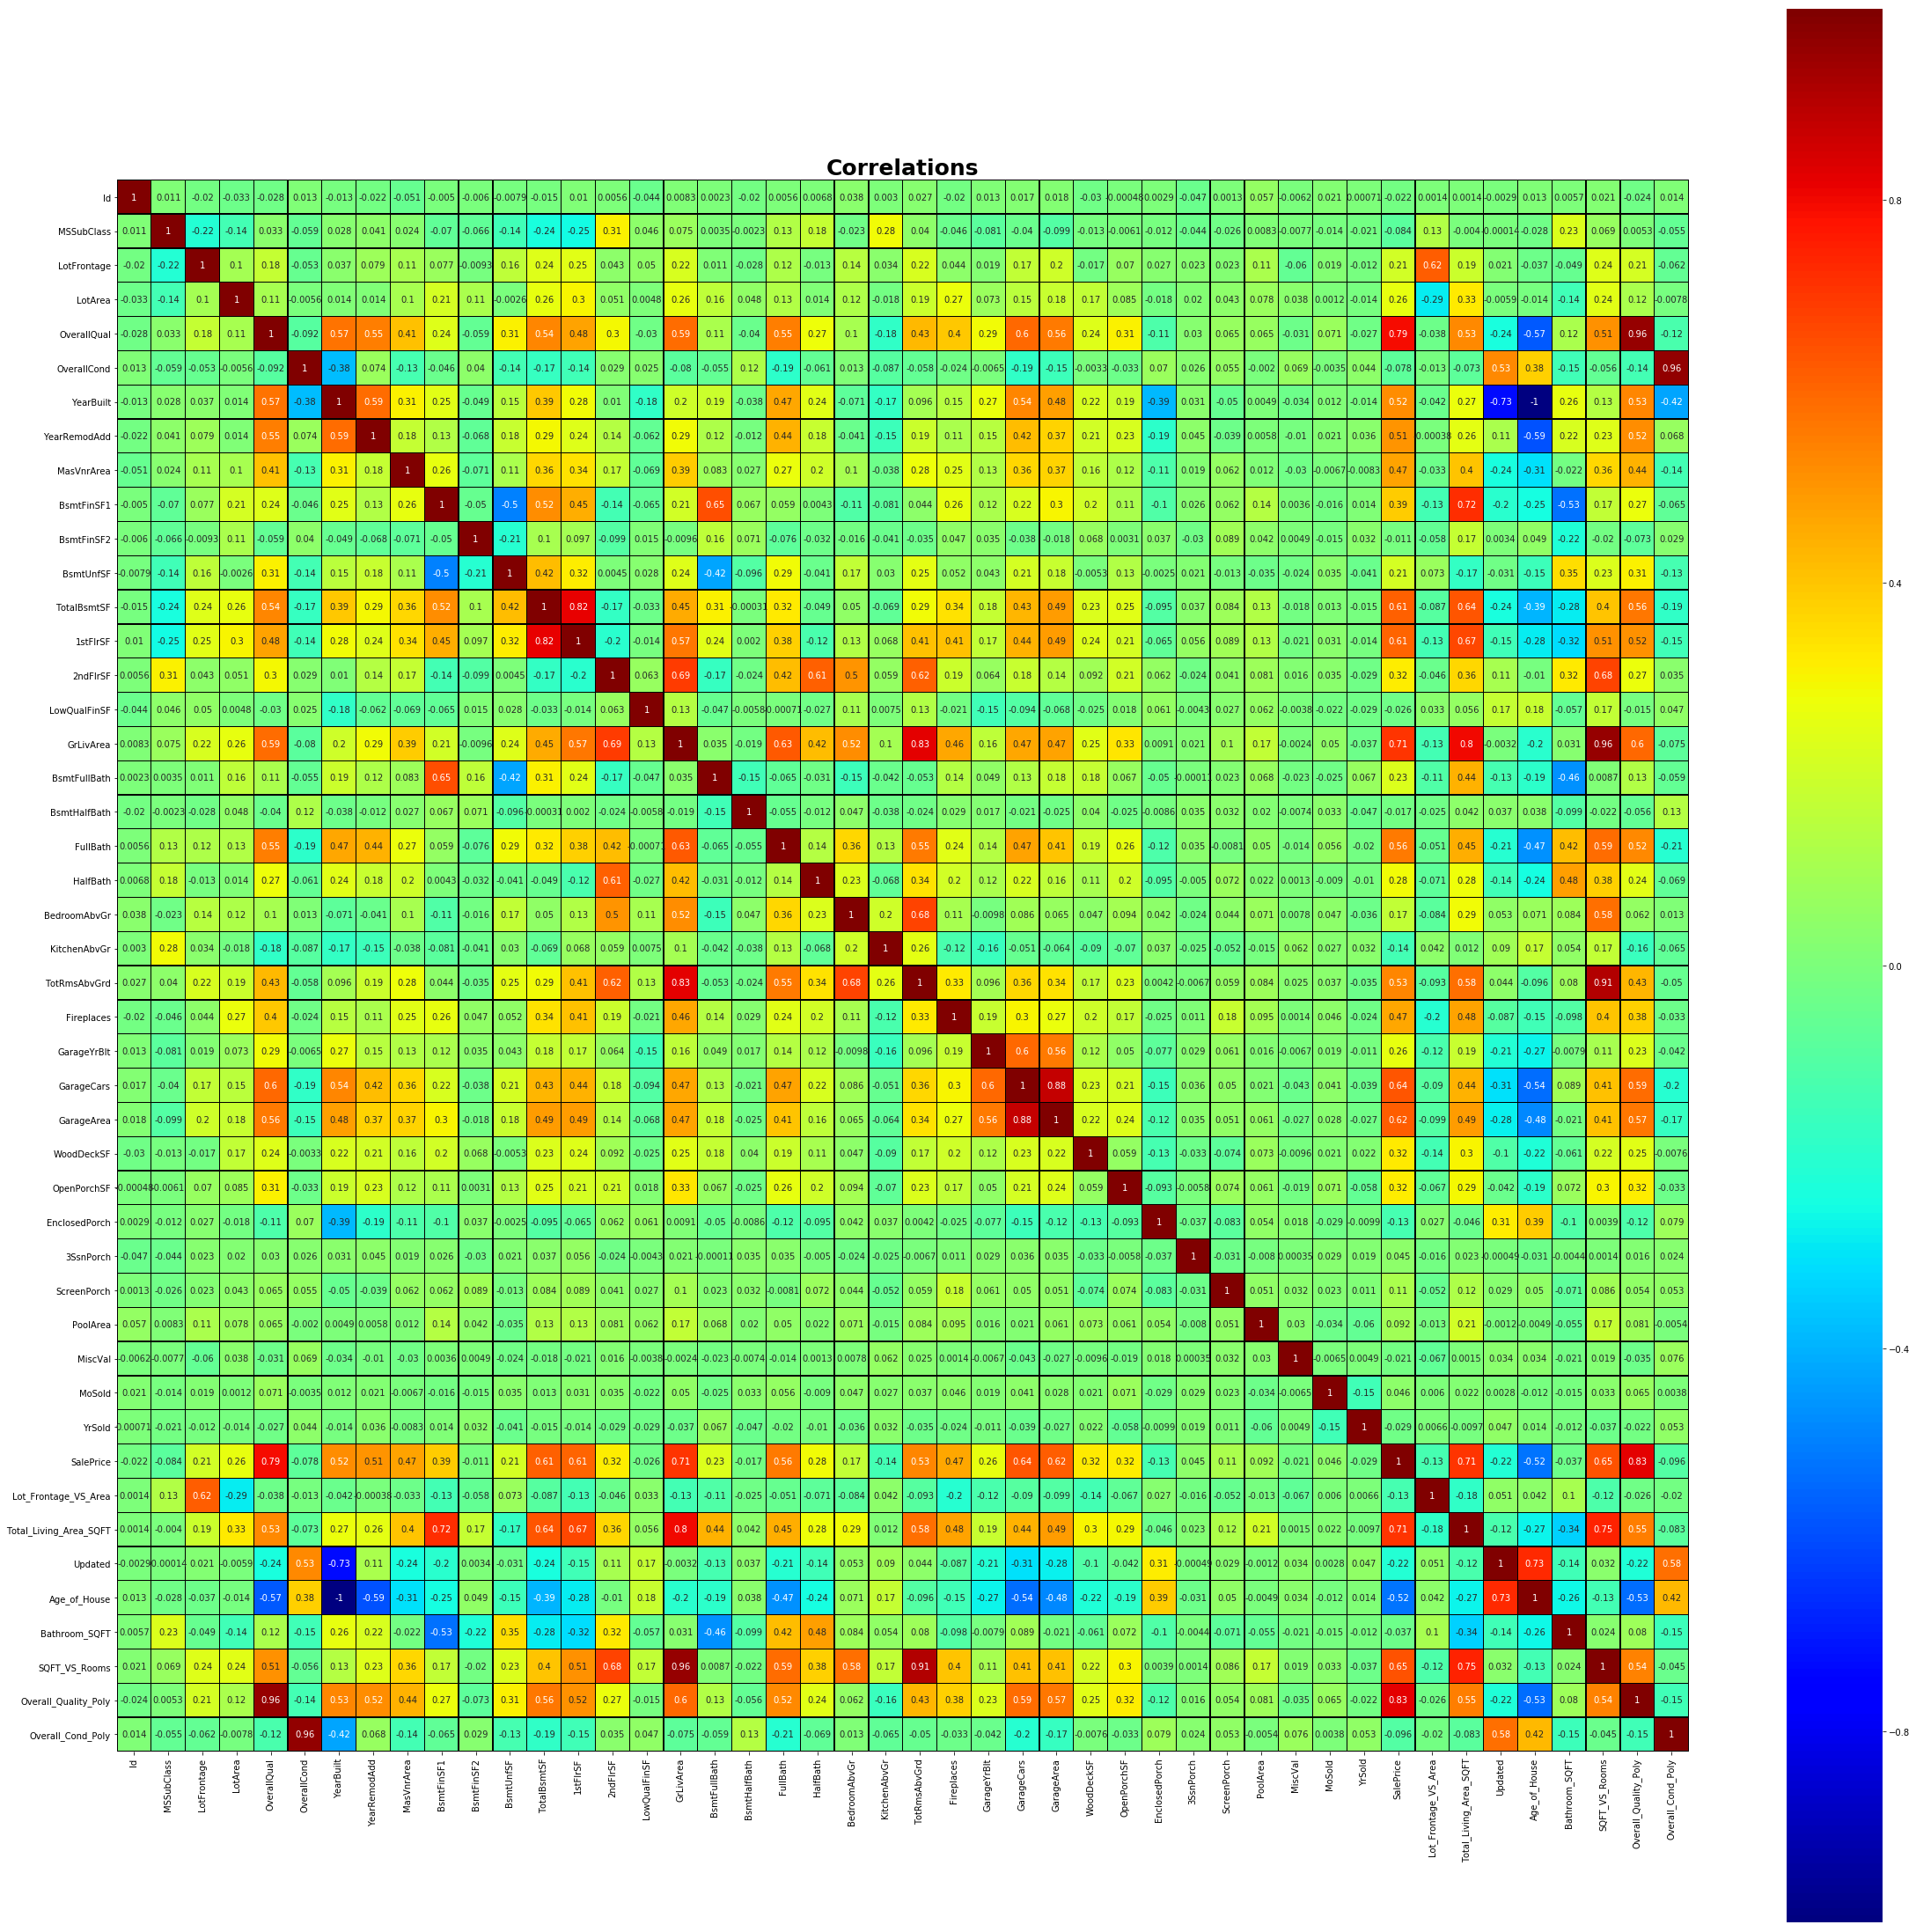

In [96]:
fig, ax = plt.subplots(figsize=(40,40))
plt.title('Correlations', fontsize=(25), fontweight='semibold')

sns_plot = sns.heatmap(numbers_only.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True, cmap="jet", linecolor='k', annot=True)
fig = sns_plot.get_figure();

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data